In [1]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [2]:
import dask.dataframe as dd

In [3]:
import pandas as pd
from pandasql import sqldf

# Importing Data

In [4]:
crime = dd.read_csv(r"C:\Users\amytu\Downloads\Crimes_-_2001_to_Present.csv",low_memory = False, dtype={'Community Area': 'float64',
       'IUCR': 'object',
       'Ward': 'float64',
        'District': 'float64'})
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
npartitions=28,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,bool,bool,int64,float64,float64,float64,object,float64,float64,int64,object,float64,float64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
crime1=crime.compute()
crime1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274430,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,7.0,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
274431,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,5.0,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
274432,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,2.0,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
274433,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,4.0,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"


# Cleaning and Checks

In [6]:
crime1.Year.unique()

array([2015, 2018, 2016, 2014, 2001, 2020, 2019, 2012, 2017, 2013, 2011,
       2007, 2003, 2010, 2008, 2009, 2002, 2005, 2006, 2022, 2021, 2004,
       2023], dtype=int64)

In [7]:
crime1.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
crime1['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [9]:
crime1.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10073
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Community Area          613476
FBI Code                     0
X Coordinate             84901
Y Coordinate             84901
Year                         0
Updated On                   0
Latitude                 84901
Longitude                84901
Location                 84901
dtype: int64

In [10]:
crime1.shape

(7739100, 22)

In [11]:
replace_values = {35:"DOUGLAS",
36:"OAKLAND",
37:"FULLER PARK",
38:"GRAND BOULEVARD",
39:"KENWOOD",
4:"LINCOLN SQUARE",
40:"WASHINGTON PARK",
41:"HYDE PARK",
42:"WOODLAWN",
1:"ROGERS PARK",
11:"JEFFERSON PARK",
12:"FOREST GLEN",
13:"NORTH PARK",
14:"ALBANY PARK",
15:"PORTAGE PARK",
16:"IRVING PARK",
17:"DUNNING",
18:"MONTCLARE",
19:"BELMONT CRAGIN",
2:"WEST RIDGE",
20:"HERMOSA",
21:"AVONDALE",
22:"LOGAN SQUARE",
23:"HUMBOLDT PARK",
24:"WEST TOWN",
25:"AUSTIN",
26:"WEST GARFIELD PARK",
27:"EAST GARFIELD PARK",
28:"NEAR WEST SIDE",
29:"NORTH LAWNDALE",
3:"UPTOWN",
30:"SOUTH LAWNDALE",
31:"LOWER WEST SIDE",
33:"NEAR SOUTH SIDE",
34:"ARMOUR SQUARE",
10:"NORWOOD PARK",
8:"NEAR NORTH SIDE",
32:"LOOP",
43:"SOUTH SHORE",
44:"CHATHAM",
45:"AVALON PARK",
46:"SOUTH CHICAGO",
47:"BURNSIDE",
59:"MCKINLEY PARK",
6:"LAKE VIEW",
48:"CALUMET HEIGHTS",
49:"ROSELAND",
5:"NORTH CENTER",
50:"PULLMAN",
51:"SOUTH DEERING",
52:"EAST SIDE",
53:"WEST PULLMAN",
54:"RIVERDALE",
55:"HEGEWISCH",
56:"GARFIELD RIDGE",
57:"ARCHER HEIGHTS",
58:"BRIGHTON PARK",
60:"BRIDGEPORT",
61:"NEW CITY",
62:"WEST ELSDON",
63:"GAGE PARK",
64:"CLEARING",
65:"WEST LAWN",
66:"CHICAGO LAWN",
67:"WEST ENGLEWOOD",
68:"ENGLEWOOD",
69:"GREATER GRAND CROSSING",
7:"LINCOLN PARK",
70:"ASHBURN",
71:"AUBURN GRESHAM",
72:"BEVERLY",
73:"WASHINGTON HEIGHTS",
74:"MOUNT GREENWOOD",
75:"MORGAN PARK",
76:"OHARE",
77:"EDGEWATER",
9:"EDISON PARK"}

In [12]:
crime1 = crime1.replace({"Community Area": replace_values})  
crime1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,NEW CITY,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,AUSTIN,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,CHATHAM,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,AVONDALE,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,AUSTIN,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274430,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,43.0,LINCOLN PARK,11,1170513.0,1917030.0,2022,01/03/2023 03:46:28 PM,41.927817,-87.648846,"(41.927817456, -87.648845932)"
274431,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,NORTH CENTER,14,1161968.0,1923233.0,2022,01/03/2023 03:46:28 PM,41.945022,-87.680072,"(41.945021752, -87.680071764)"
274432,12938501,JF523997,12/26/2022 10:30:00 PM,021XX W DEVON AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,50.0,WEST RIDGE,07,1160681.0,1942466.0,2022,01/03/2023 03:46:28 PM,41.997825,-87.684267,"(41.997824802, -87.684266677)"
274433,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,LINCOLN SQUARE,05,1158237.0,1929586.0,2022,01/03/2023 03:46:28 PM,41.962532,-87.693611,"(41.962531969, -87.693611152)"


In [13]:
crime1.Date.max()

'12/31/2022 12:59:00 PM'

In [14]:
crime1.Date.min()

'01/01/2001 01:00:00 AM'

In [15]:
#checked with csv - no duplicate rows found
crime1['Case Number'].nunique()

7738561

# Creating Subset for Tableau Analysis

In [16]:
crime1 = crime1.loc[(crime1['Year'] > 2004) & (crime1['Year'] <= 2010)]
crime1.shape

(2529490, 22)

In [17]:
crime1.rename(columns={"Primary Type": "Primary_Type"}, inplace=True)
crime1.tail()

C:\Users\amytu\AppData\Local\Temp\ipykernel_52452\4060729735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime1.rename(columns={"Primary Type": "Primary_Type"}, inplace=True)


,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
112005,12697590,JF130943,01/17/2007 12:00:00 AM,086XX S ESSEX AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,7.0,SOUTH CHICAGO,17,NaN,NaN,2007,10/15/2022 04:48:12 PM,NaN,NaN,NaN
112063,12858988,JF434223,08/10/2010 12:01:00 AM,102XX S AVENUE L,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,10.0,EAST SIDE,06,NaN,NaN,2010,10/15/2022 04:48:12 PM,NaN,NaN,NaN
113061,12863318,JF439562,07/07/2010 12:00:00 AM,026XX S DRAKE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,False,...,22.0,SOUTH LAWNDALE,02,NaN,NaN,2010,10/19/2022 04:52:39 PM,NaN,NaN,NaN
114061,6363068,HP448304,07/12/2008 01:55:00 PM,033XX W FULLERTON AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,SMALL RETAIL STORE,False,False,...,35.0,LOGAN SQUARE,03,1153545.0,1915755.0,2008,10/04/2022 04:44:55 PM,41.924674,-87.711231,"(41.924673521, -87.711230943)"
114135,3949,HN136125,01/21/2007 03:35:00 PM,017XX E 85TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,...,8.0,AVALON PARK,01A,1189364.0,1848633.0,2007,10/06/2022 04:47:03 PM,41.739699,-87.581776,"(41.739698771, -87.581775883)"


In [18]:
crime1.rename(columns={"Case Number": "Case_Number"}, inplace=True)
crime1.head()

C:\Users\amytu\AppData\Local\Temp\ipykernel_52452\1989070574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime1.rename(columns={"Case Number": "Case_Number"}, inplace=True)


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
818,11039126,JA371798,01/01/2007 12:01:00 AM,009XX N DRAKE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,27.0,HUMBOLDT PARK,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
868,11042930,JA374409,01/01/2010 12:01:00 AM,080XX S MARSHFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,21.0,AUBURN GRESHAM,02,NaN,NaN,2010,08/05/2017 03:50:08 PM,NaN,NaN,NaN
871,11042861,JA374153,01/01/2007 12:01:00 AM,026XX W 21ST ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,28.0,SOUTH LAWNDALE,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
874,11042914,JA374555,01/01/2008 12:01:00 AM,011XX S WHIPPLE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,28.0,NORTH LAWNDALE,02,NaN,NaN,2008,08/19/2017 03:48:07 PM,NaN,NaN,NaN
902,11042938,JA377035,01/01/2007 12:01:00 AM,019XX N HARLEM AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,DAY CARE CENTER,False,False,...,36.0,AUSTIN,02,NaN,NaN,2007,08/19/2017 03:48:07 PM,NaN,NaN,NaN


In [19]:
crime1.rename(columns={"X Coordinate": "X_Coordinate"}, inplace=True)
crime1.head()

C:\Users\amytu\AppData\Local\Temp\ipykernel_52452\1150864363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime1.rename(columns={"X Coordinate": "X_Coordinate"}, inplace=True)


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X_Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
818,11039126,JA371798,01/01/2007 12:01:00 AM,009XX N DRAKE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,27.0,HUMBOLDT PARK,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
868,11042930,JA374409,01/01/2010 12:01:00 AM,080XX S MARSHFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,21.0,AUBURN GRESHAM,02,NaN,NaN,2010,08/05/2017 03:50:08 PM,NaN,NaN,NaN
871,11042861,JA374153,01/01/2007 12:01:00 AM,026XX W 21ST ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,28.0,SOUTH LAWNDALE,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
874,11042914,JA374555,01/01/2008 12:01:00 AM,011XX S WHIPPLE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,28.0,NORTH LAWNDALE,02,NaN,NaN,2008,08/19/2017 03:48:07 PM,NaN,NaN,NaN
902,11042938,JA377035,01/01/2007 12:01:00 AM,019XX N HARLEM AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,DAY CARE CENTER,False,False,...,36.0,AUSTIN,02,NaN,NaN,2007,08/19/2017 03:48:07 PM,NaN,NaN,NaN


In [20]:
crime1.rename(columns={"Y Coordinate": "Y_Coordinate"}, inplace=True)
crime1.head()

C:\Users\amytu\AppData\Local\Temp\ipykernel_52452\2134982909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime1.rename(columns={"Y Coordinate": "Y_Coordinate"}, inplace=True)


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X_Coordinate,Y_Coordinate,Year,Updated On,Latitude,Longitude,Location
818,11039126,JA371798,01/01/2007 12:01:00 AM,009XX N DRAKE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,27.0,HUMBOLDT PARK,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
868,11042930,JA374409,01/01/2010 12:01:00 AM,080XX S MARSHFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,21.0,AUBURN GRESHAM,02,NaN,NaN,2010,08/05/2017 03:50:08 PM,NaN,NaN,NaN
871,11042861,JA374153,01/01/2007 12:01:00 AM,026XX W 21ST ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,28.0,SOUTH LAWNDALE,02,NaN,NaN,2007,10/21/2017 03:44:12 PM,NaN,NaN,NaN
874,11042914,JA374555,01/01/2008 12:01:00 AM,011XX S WHIPPLE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,28.0,NORTH LAWNDALE,02,NaN,NaN,2008,08/19/2017 03:48:07 PM,NaN,NaN,NaN
902,11042938,JA377035,01/01/2007 12:01:00 AM,019XX N HARLEM AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,DAY CARE CENTER,False,False,...,36.0,AUSTIN,02,NaN,NaN,2007,08/19/2017 03:48:07 PM,NaN,NaN,NaN


In [21]:
crime1.rename(columns={"Community Area": "Community_Area"}, inplace=True)
crime1.tail()

C:\Users\amytu\AppData\Local\Temp\ipykernel_52452\1621579291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime1.rename(columns={"Community Area": "Community_Area"}, inplace=True)


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,Domestic,...,Ward,Community_Area,FBI Code,X_Coordinate,Y_Coordinate,Year,Updated On,Latitude,Longitude,Location
112005,12697590,JF130943,01/17/2007 12:00:00 AM,086XX S ESSEX AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,7.0,SOUTH CHICAGO,17,NaN,NaN,2007,10/15/2022 04:48:12 PM,NaN,NaN,NaN
112063,12858988,JF434223,08/10/2010 12:01:00 AM,102XX S AVENUE L,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,10.0,EAST SIDE,06,NaN,NaN,2010,10/15/2022 04:48:12 PM,NaN,NaN,NaN
113061,12863318,JF439562,07/07/2010 12:00:00 AM,026XX S DRAKE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,False,...,22.0,SOUTH LAWNDALE,02,NaN,NaN,2010,10/19/2022 04:52:39 PM,NaN,NaN,NaN
114061,6363068,HP448304,07/12/2008 01:55:00 PM,033XX W FULLERTON AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,SMALL RETAIL STORE,False,False,...,35.0,LOGAN SQUARE,03,1153545.0,1915755.0,2008,10/04/2022 04:44:55 PM,41.924674,-87.711231,"(41.924673521, -87.711230943)"
114135,3949,HN136125,01/21/2007 03:35:00 PM,017XX E 85TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,True,False,...,8.0,AVALON PARK,01A,1189364.0,1848633.0,2007,10/06/2022 04:47:03 PM,41.739699,-87.581776,"(41.739698771, -87.581775883)"


In [22]:
crime1 = sqldf('''SELECT ID, Case_Number, Date, Primary_Type, Description, Arrest, Community_Area, X_Coordinate, Y_Coordinate, Year, Latitude, Longitude
FROM crime1
WHERE Primary_Type like "%THEFT%" 
or Primary_Type like "%BURGLARY%" 
or Primary_Type like "%ROBBERY%" 
or Primary_Type like "%MOTOR VEHICLE THEFT%"''')

In [23]:
crime1.shape

(868041, 12)

In [24]:
crime1.head()

,ID,Case_Number,Date,Primary_Type,Description,Arrest,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
0,4227855,HL534770,08/07/2005 07:15:00 AM,THEFT,OVER $500,0,AUSTIN,NaN,NaN,2005,NaN,NaN
1,5145265,HM742840,10/01/2005 09:00:00 AM,THEFT,OVER $500,1,SOUTH LAWNDALE,NaN,NaN,2005,NaN,NaN
2,6100076,HP196422,02/26/2008 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,0,WEST RIDGE,NaN,NaN,2008,NaN,NaN
3,6329138,HP422605,06/28/2008 11:00:00 PM,THEFT,OVER $500,0,UPTOWN,NaN,NaN,2008,NaN,NaN
4,6534949,HP599238,09/23/2008 06:30:00 AM,THEFT,$500 AND UNDER,0,BRIGHTON PARK,NaN,NaN,2008,NaN,NaN


In [25]:
crime1.tail()

,ID,Case_Number,Date,Primary_Type,Description,Arrest,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
868036,4562014,HM151590,01/28/2006 07:39:00 PM,BURGLARY,FORCIBLE ENTRY,0,LAKE VIEW,1164009.0,1924936.0,2006,41.949652,-87.672522
868037,6597742,HP669294,11/06/2008 06:30:00 AM,BURGLARY,FORCIBLE ENTRY,1,SOUTH DEERING,1194444.0,1840196.0,2008,41.716424,-87.563440
868038,7817771,HS627042,11/20/2010 02:00:00 PM,BURGLARY,UNLAWFUL ENTRY,0,NORTH CENTER,1161338.0,1925560.0,2010,41.951420,-87.682322
868039,12858988,JF434223,08/10/2010 12:01:00 AM,THEFT,$500 AND UNDER,0,EAST SIDE,NaN,NaN,2010,NaN,NaN
868040,6363068,HP448304,07/12/2008 01:55:00 PM,ROBBERY,STRONG ARM - NO WEAPON,0,LOGAN SQUARE,1153545.0,1915755.0,2008,41.924674,-87.711231


In [26]:
crime1.to_csv(r"C:\Users\amytu\OneDrive\Documents\Tableau\Chicago Crime Data.csv")

# Quick Visualization of Major Question

In [27]:
import matplotlib.pyplot as plt

In [28]:
y = crime1.Year
y

0         2005
1         2005
2         2008
3         2008
4         2008
          ... 
868036    2006
868037    2008
868038    2010
868039    2010
868040    2008
Name: Year, Length: 868041, dtype: int64

In [29]:
new_df= crime1.Year
new_df

0         2005
1         2005
2         2008
3         2008
4         2008
          ... 
868036    2006
868037    2008
868038    2010
868039    2010
868040    2008
Name: Year, Length: 868041, dtype: int64

In [30]:
df2 = crime1.groupby('Year')['ID'].agg('count').reset_index()
df2

,Year,ID
0,2005,149731
1,2006,148350
2,2007,144037
3,2008,150236
4,2009,139205
5,2010,136482


<BarContainer object of 6 artists>

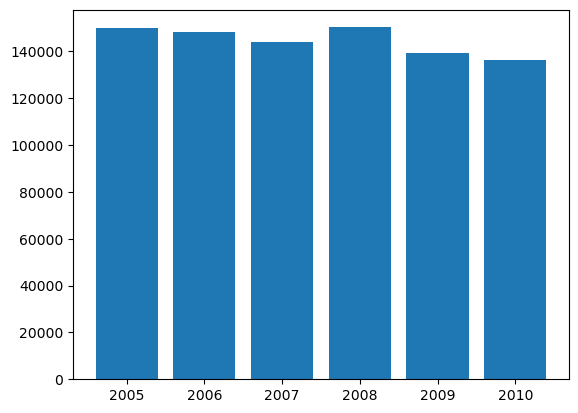

In [31]:
plt.bar(df2['Year'], df2['ID'])

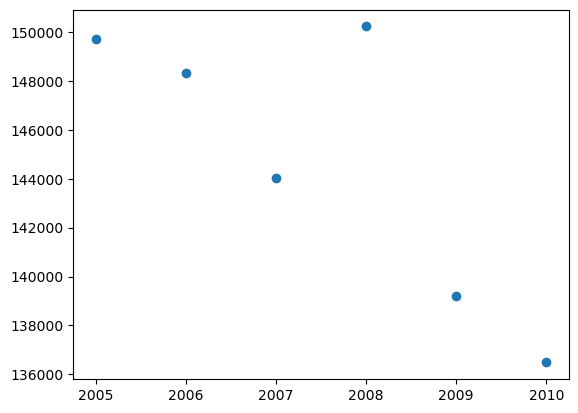

In [32]:
plt.scatter(df2['Year'], df2['ID'])

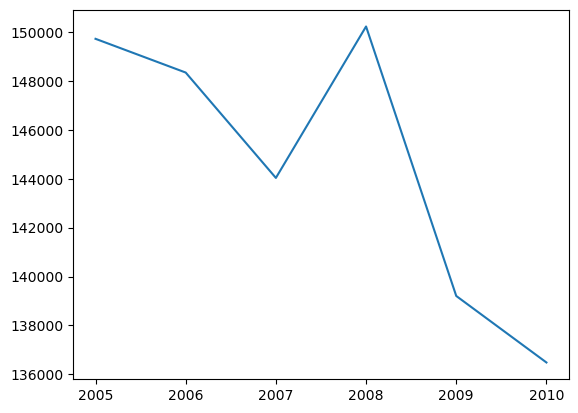

In [33]:
plt.plot(df2['Year'], df2['ID'])

# Functions

In [34]:
df2.describe()

,Year,ID
count,6.000000,6.000000
mean,2007.500000,144673.500000
std,1.870829,5786.996829
min,2005.000000,136482.000000
25%,2006.250000,140413.000000
50%,2007.500000,146193.500000
75%,2008.750000,149385.750000
max,2010.000000,150236.000000


In [40]:
144674 + 5787

150461

In [41]:
144674 - 5787

138887

In [42]:
def x (x):
    
    if x < 138887:
        return ("Less than Average")
    elif x >= 138887 and x <= 150461:
        return ("Average")
    else:
        return("Above Average")

In [43]:
df2['rates']=df2['ID'].apply(x)
df2

,Year,ID,rates
0,2005,149731,Average
1,2006,148350,Average
2,2007,144037,Average
3,2008,150236,Average
4,2009,139205,Average
5,2010,136482,Less than Average
